<h3>Import packages for data understanding and exploratory data analysis</h3>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

<h3>Get the data</h3>

In [2]:
data = pd.read_csv('dataset/data.csv')

data.shape

(4250, 20)

<p>The training dataset contains 4250 samples. Each sample contains 19 features and 1 boolean variable "churn" which indicates the class of the sample. The 19 input features and 1 target variable are:</p>

<ol>
    <li>"state", string. 2-letter code of the US state of customer residence</li>
    <li>"account_length", numerical. Number of months the customer has been with the current telco provider</li>
    <li>"area_code", string="area_code_AAA" where AAA = 3 digit area code</li>
    <li>"international_plan", (yes/no). The customer has international plan</li>
    <li>"voice_mail_plan", (yes/no). The customer has voice mail plan</li>
    <li>"number_vmail_messages", numerical. Number of voice-mail messages</li>
    <li>"total_day_minutes", numerical. Total minutes of day calls</li>
    <li>"total_day_calls", numerical. Total number of day calls</li>
    <li>"total_day_charge", numerical. Total charge of day calls</li>
    <li>"total_eve_minutes", numerical. Total minutes of evening calls</li>
    <li>"total_eve_calls", numerical. Total number of evening calls</li>
    <li>"total_eve_charge", numerical. Total charge of evening calls</li>
    <li>"total_night_minutes", numerical. Total minutes of night calls</li>
    <li>"total_night_calls", numerical. Total number of night calls</li>
    <li>"total_night_charge", numerical. Total charge of night calls</li>
    <li>"total_intl_minutes", numerical. Total minutes of international calls</li>
    <li>"total_intl_calls", numerical. Total number of international calls</li>
    <li>"total_intl_charge", numerical. Total charge of international calls</li>
    <li>"number_customer_service_calls", numerical. Number of calls to customer service</li>
    <li>"churn", (yes/no). Customer churn - target variable</li>
</ol>

<p>The data is acquired from <a href='https://www.kaggle.com/c/customer-churn-prediction-2020/data'>Kaggle</a></p>

<h3>Short inspection of the data</h3>

In [3]:
#sneak peek at the data
data.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

<p>Luckily, we don't have any null values</p>

In [5]:
#let's see the statistical figures of numerical features
data.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


<p>There is something odd with <strong>number_vmail_messages</strong> column. Let's check it further, later</p>

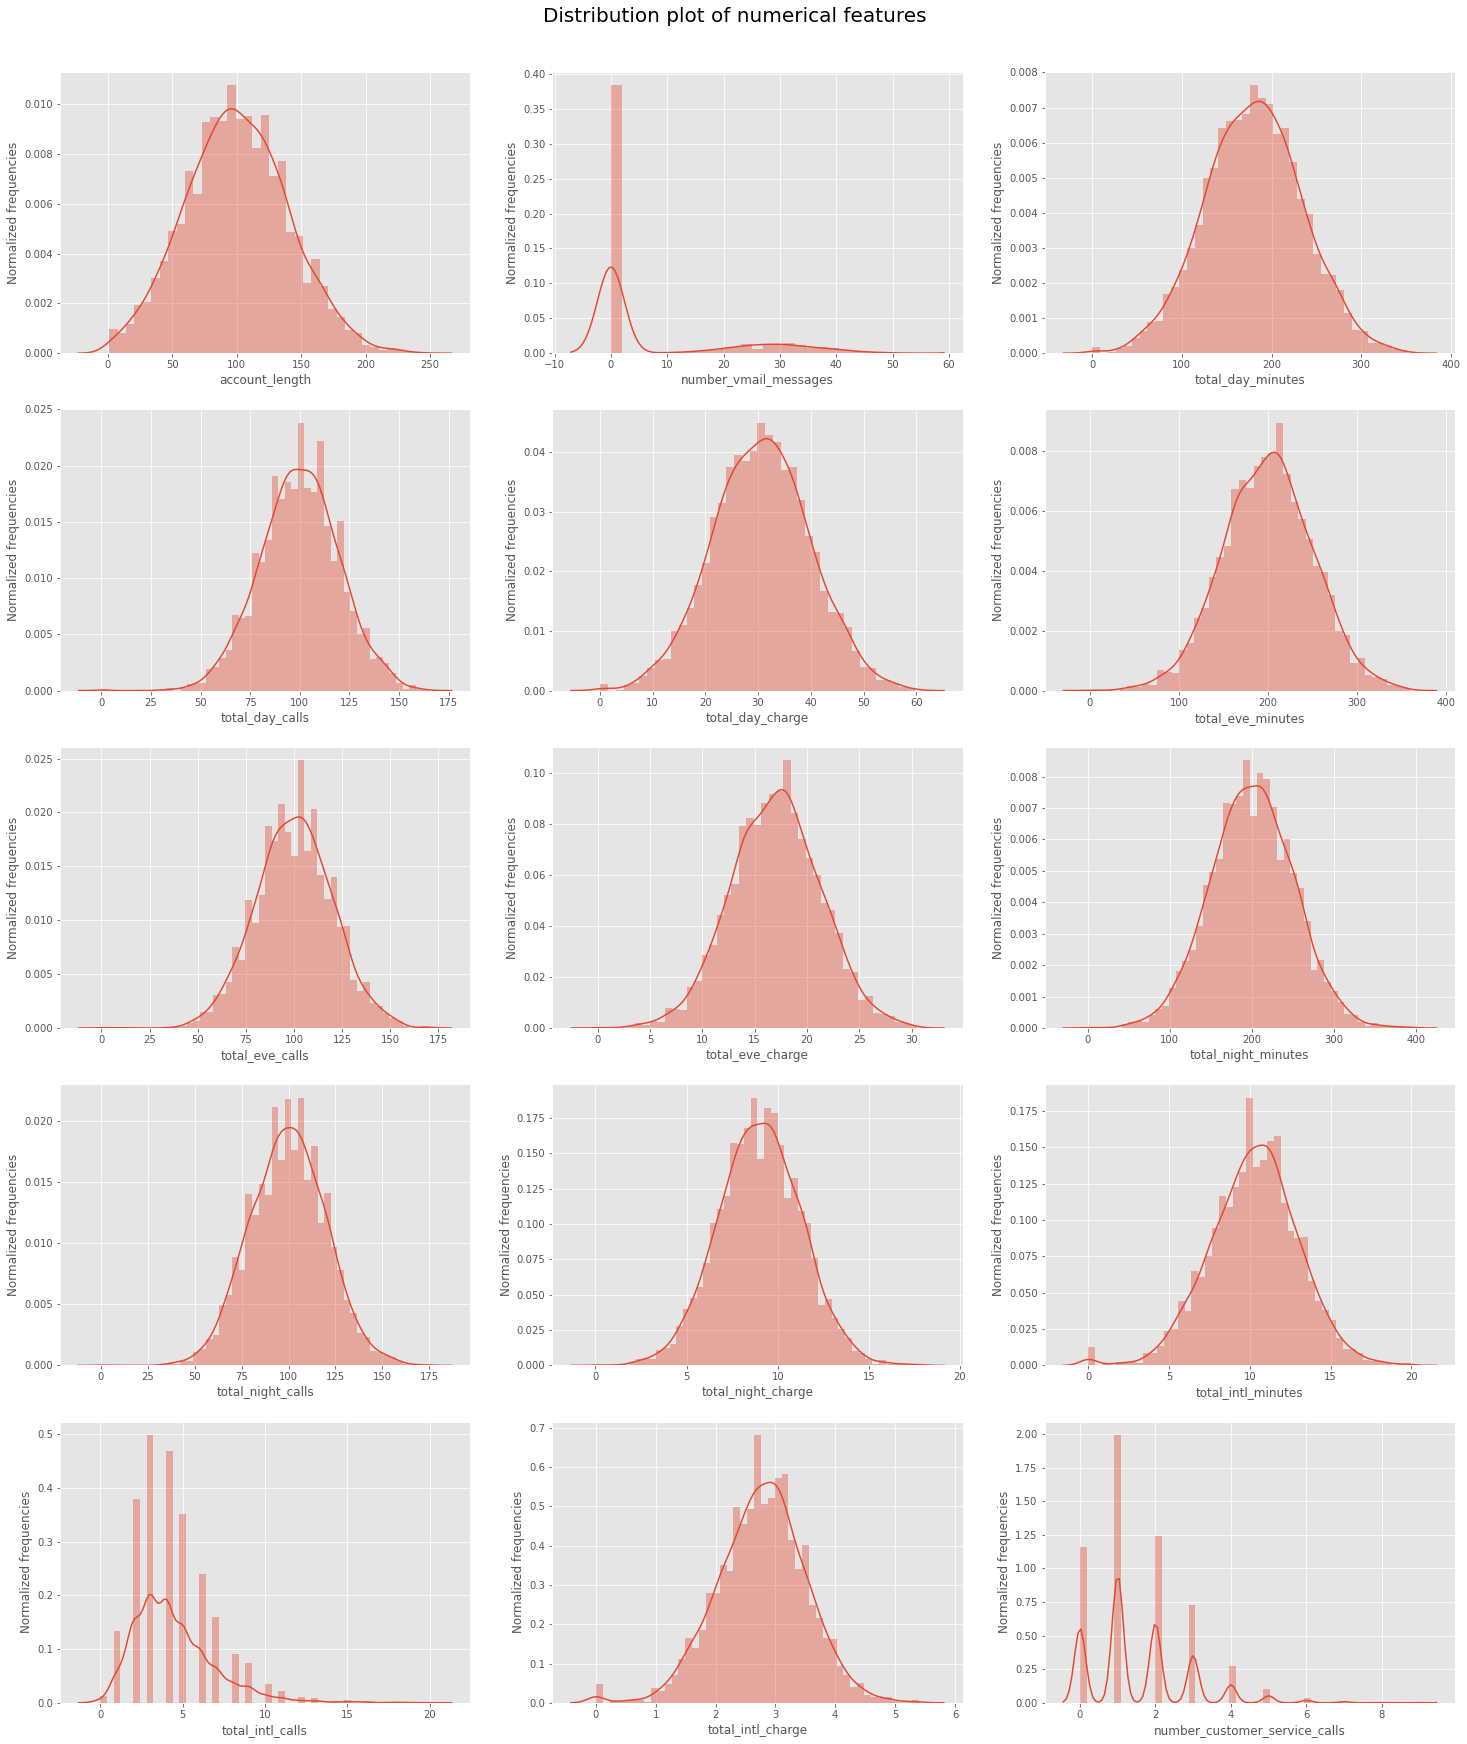

In [6]:
#check the value distribution of numerical features
numerical_cols = ['account_length', 'number_vmail_messages', 'total_day_minutes',
                 'total_day_calls', 'total_day_charge', 'total_eve_minutes',
                 'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
                 'total_night_calls', 'total_night_charge', 'total_intl_minutes',
                 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls']

fig, ax = plt.subplots(nrows=5, ncols=3, figsize=(25, 30))
ax = ax.ravel()

for i in range(len(numerical_cols)):
    sns.distplot(data[numerical_cols[i]], ax=ax[i])
    ax[i].set_ylabel('Normalized frequencies')

fig.suptitle('Distribution plot of numerical features', fontsize=20, y=0.91);

<p>Most of the distribution of our data features follow Gaussian distribution</p>

<h3>Data split</h3>

In [8]:
data['account_length'].describe()

count    4250.000000
mean      100.236235
std        39.698401
min         1.000000
25%        73.000000
50%       100.000000
75%       127.000000
max       243.000000
Name: account_length, dtype: float64

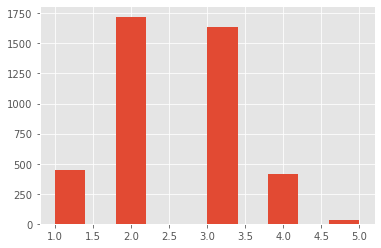

In [11]:
data['account_length_cat'] = pd.cut(data['account_length'],
                                   bins=[0., 50., 100., 150., 200., np.inf],
                                   labels=[1, 2, 3, 4, 5])

data['account_length_cat'].hist();

In [12]:
data['account_length_cat'].value_counts()

2    1722
3    1639
1     447
4     414
5      28
Name: account_length_cat, dtype: int64